In [215]:
import pandas as pd
import numpy as np

from IPython.display import display, display_html

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

from simulator import *
from simulator_plotting import *

init_notebook_mode(connected=True)

In [183]:
landscape = dataset1[0].loc['10μM'].tolist()

In [184]:
greedy_count = 0
total_count = 100
for i in range(0,total_count):
    results = simulate(landscape, timesteps=1200, seed='0001')
    if results['greedy_path'] == results['actual_path']:
        greedy_count += 1
greedy_count / total_count

0.82

In [189]:
results = simulate([landscape], timesteps=700, seed='0001')
plot_simulation(results)

In [190]:
results['greedy_path']

['0001', '1001', '1011', '1111', '1110']

In [191]:
results['actual_path']

['0001', '1001', '1011', '1010', '1110']

In [65]:
landscape = dataset2.loc['AMC'].tolist()
landscape2 = dataset2.loc['AM'].tolist()
for i in range (0, 1000):
    results = simulate([landscape, landscape2], durations=[200, 1000])
    if results['T_1'] != -1:
        plot_simulation(results)

In [2]:
landscape = dataset2.loc['AMC'].tolist()
landscape2 = dataset2.loc['AM'].tolist()
results = simulate([landscape, landscape2], frequency=200)
plot_simulation(results)

## Which trajectory does a population follow?

The **greedy path** can be determined by applying a simple algorithm to the fitness landscape. Start at the seed genotype and choose its fittest (highest growth rate) mutational neighbor. Continue choosing fittest mutational neighbors until the global optimum is reached, or until a mutational neighbor with higher fitness than the current genotype can no longer be found. In the latter case, a local optimum has been reached.

Through modifications to the simulator code, an "**actual path**" can be determined. During the mutation phase of the simulation, determine whether each mutant indicates the first appearance of a genotype. If a genotype is appearing for the first time, store the genotype it mutated from in an array. After the simulation has finished running, generate a path by starting from the dominant genotype and adding the genotype it mutated from, and then the genotype that genotype mutated from, and so on, until the seed is reached.

Often, during a simulation the population will simply follow the trajectory of the greedy path. Sometimes a path leading to a local optimum will out-compete the greedy path, and so the "actual path" represents the true evolutionary trajectory of the population. Other times the greedy path and the "actual path" will differ, but both lead to the global optimum. In this case it can be said that the true trajectory of the population consists of the greedy path and the "actual path" being followed in parallel. Since both paths are being followed, re-running the simulation multiple times will likely lead to some proportion of the resulting "actual paths" being equivalent to the greedy path.

In sum, plotting the greedy path and the "actual path" will likely suffice in getting a sense of the evolutionary trajectory of the population.

In [3]:
import igraph as ig

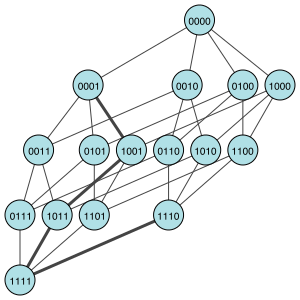

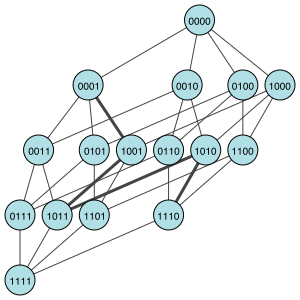

In [220]:
def plot_path(path, num_genotypes):
    g = ig.Graph()
    g.add_vertices(num_genotypes)
    g.vs["name"] = genotype_strings(num_genotypes)

    for gen in range(num_genotypes):
        neighbors = [gen ^ 1 << i for i in range(4)]
        for n in neighbors:
            if not g.are_connected(gen, n):
                g.add_edge(gen, n)

    g.es["on_path"] = False
    for i, gen in enumerate(path[:-1]):
        e = g.get_eid(g.vs.find(gen), g.vs.find(path[i+1]))
        g.es[e]["on_path"] = True

    visual_style = {
        'layout': g.layout("rt"),
        'vertex_label': g.vs["name"],
        'bbox': (300,300),
        'vertex_size': 30,
        'vertex_label_size': 10,
        'vertex_color': "Powder Blue",
        'edge_width': [1 + 2 * int(on_path) for on_path in g.es["on_path"]]
    }
    layout = g.layout("rt")
    return ig.plot(g, **visual_style)
display(plot_path(results['greedy_path'], 16))
display(plot_path(results['actual_path'], 16))


In [173]:
g[9,12]

0

In [174]:
g.get_eid("0001", "1001")

6